In [3]:
#结合推导公式的代码,旨在建立一个3层神经网络(输入层节点数为2,隐含层节点数为2,输出层节点数为2)
#引库
import numpy as np
import matplotlib.pyplot as plt
#嵌入图片
%matplotlib inline

#输入层数据
i = [0.05,0.10]
#输入层到隐含层的权重
w1 = [0.15,0.20,0.25,0.30]
#隐含层到输出层的权重
w2 = [0.40,0.45,0.50,0.55]
#输入层到隐含层的偏置
b1 = 0.35
#隐含层到输出层的偏置
b2 = 0.6
#原始的结果
y = [0.01,0.99]
#为第一二层运行的结果建立列表
out_one = []
out_two = []

out_three = []
out_four =[]
#设置学习率
alpha = 0.1

count = 0

while True:
  #-----------前向传播-------------
  #输入层--->隐含层
  net1 = i[0]*w1[0] + b1
  net2 = i[1]*w1[1] + b1
  out1 = 1/(1+np.exp(-net1))
  out_one.append(out1)
  out2 = 1/(1+np.exp(-net2))
  out_one.append(out2)
  #隐含层--->输出层
  net3 = out_one[0]*w2[0] + b1
  net4 = out_one[1]*w2[1] + b1
  out3 = 1/(1+np.exp(-net3))
  out_two.append(out3)
  out4 = 1/(1+np.exp(-net4))
  out_two.append(out4)
  #-------------完成----------------  

  '''  
  ----------计算误差---------------
  Etotal = E1 + E2
  E = 0.5*(target - out)^2
  '''
  E = 0.5*(y[0] - out_two[0])**2 + 0.5*(y[1] - out_two[1])**2
  #-------------完成-----------------


  #----------反向传播---------------
  #输出层--->隐含层
  pd5 = -(y[0] - out_two[0])*out_two[0]*(1-out_two[0])*out_one[0]
  pd6 = -(y[0] - out_two[0])*out_two[0]*(1-out_two[0])*out_one[1]
  pd7 = -(y[1] - out_two[1])*out_two[1]*(1-out_two[1])*out_one[0]
  pd8 = -(y[1] - out_two[1])*out_two[1]*(1-out_two[1])*out_one[1]
  #第二层权值更新
  w2[0] = w2[0] - alpha*pd5
  w2[1] = w2[1] - alpha*pd6
  w2[2] = w2[2] - alpha*pd7
  w2[3] = w2[3] - alpha*pd8

  #隐含层--->输入层
  F1 = -(y[0] - out_two[0])*out_two[0]*(1-out_two[0])
  F2 = -(y[1] - out_two[1])*out_two[1]*(1-out_two[1])
  pd1 = (F1*w2[0] + F2*w2[2])*out_one[0]*(1 - out_one[0])*i[0]
  pd2 = (F1*w2[0] + F2*w2[2])*out_one[0]*(1 - out_one[0])*i[1]
  pd3 = (F1*w2[1] + F2*w2[1])*out_one[1]*(1 - out_one[1])*i[0]
  pd4 = (F1*w2[1] + F2*w2[1])*out_one[1]*(1 - out_one[1])*i[1]
  #第一层权值更新
  w1[0] = w1[0] - alpha*pd1
  w1[1] = w1[1] - alpha*pd2
  w1[2] = w1[2] - alpha*pd3
  w1[3] = w1[3] - alpha*pd4
  #-----------完成-------------------

  #print("第一层四个权值更新为:",w1)
  #print("第二层四个权值更新为:",w2)

  #-----------二次前向传播-------------
  #输入层--->隐含层
  net5 = i[0]*w1[0] + b1
  net6 = i[1]*w1[1] + b1
  out5 = 1/(1+np.exp(-net5))
  out_three.append(out5)
  out6 = 1/(1+np.exp(-net6))
  out_three.append(out6)
  #隐含层--->输出层
  net7 = out_one[0]*w2[0] + b1
  net8 = out_one[1]*w2[1] + b1
  out7 = 1/(1+np.exp(-net7))
  out_four.append(out7)
  out8 = 1/(1+np.exp(-net8))
  out_four.append(out8)
  #-------------完成----------------  
  count += 1
  #print("再一次前项传播的结果为:",out_four)
  if count == 10000:
    break
print("最终O1的结果为:",out_three[9999])
print("最终O2的结果为:",out_four[9999])

最终O1的结果为: 0.9943957071639503
最终O2的结果为: 1.707242813286684e-11


<function matplotlib.pyplot.show(*args, **kw)>

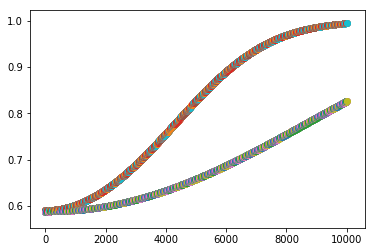

In [2]:
for i in range(10000):
    plt.scatter(i,out_three[i])
plt.show

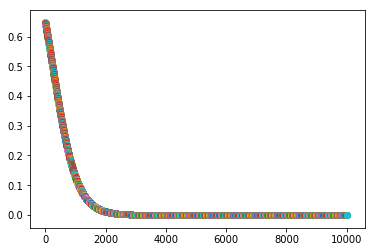

In [4]:
for j in range(10000):
    plt.scatter(j,out_four[j])
plt.show()